Library yang digunakan

    - pandas
    - numpy
    - matplotlib
    - seaborn
    - sklearn

# Proyek Machine Learning Terapan Akhir : Rekomendasi Game
- **Nama:** Fikri Khoiruddin
- **Email:** fikrikhoiruddin28@gmail.com
- **ID Dicoding:** fikrikhoiruddin28

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors


## Memuat Dataset
Kode ini memuat dataset game dari file CSV. Dataset ini berisi informasi seperti nama game, rasio ulasan positif, jumlah ulasan, rating, dan informasi lainnya yang relevan untuk membangun sistem rekomendasi.

In [130]:
game_df = pd.read_csv("https://raw.githubusercontent.com/jurus231/MLTerapanLastAssg/refs/heads/main/games.csv")
game_df

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50867,2296380,I Expect You To Die 3: Cog in the Machine,2023-09-28,True,False,False,Very Positive,96,101,22.00,0.00,0.0,True
50868,1272080,PAYDAY 3,2023-09-21,True,False,False,Mostly Negative,38,29458,40.00,0.00,0.0,True
50869,1402110,Eternights,2023-09-11,True,False,False,Very Positive,89,1128,30.00,0.00,0.0,True
50870,2272250,Forgive Me Father 2,2023-10-19,True,False,False,Very Positive,95,82,17.00,0.00,0.0,True


Fungsi dari code dibawah ini memberikan ringkasan mengenai kecenderungan sentral, dispersi, dan bentuk distribusi data, termasuk informasi seperti count, mean, std, min, dan quantiles

In [131]:
game_df.describe()

,app_id,positive_ratio,user_reviews,price_final,price_original,discount
count,5.087200e+04,50872.000000,5.087200e+04,50872.000000,50872.000000,50872.000000
mean,1.055224e+06,77.052033,1.824425e+03,8.620325,8.726788,5.592212
std,6.103249e+05,18.253592,4.007352e+04,11.514164,11.507021,18.606679
min,1.000000e+01,0.000000,1.000000e+01,0.000000,0.000000,0.000000
25%,5.287375e+05,67.000000,1.900000e+01,0.990000,0.990000,0.000000
50%,9.860850e+05,81.000000,4.900000e+01,4.990000,4.990000,0.000000
75%,1.524895e+06,91.000000,2.060000e+02,10.990000,11.990000,0.000000
max,2.599300e+06,100.000000,7.494460e+06,299.990000,299.990000,90.000000


Code isnull() & sum() dibawah ini melakukan pengecekan tiap kolom apakah ada missing value

Code dtypes() melakukan pengecekan tipe data di setiap kolom

In [132]:
print(game_df.isna().sum())

print(game_df.dtypes)

app_id            0
title             0
date_release      0
win               0
mac               0
linux             0
rating            0
positive_ratio    0
user_reviews      0
price_final       0
price_original    0
discount          0
steam_deck        0
dtype: int64
app_id              int64
title              object
date_release       object
win                  bool
mac                  bool
linux                bool
rating             object
positive_ratio      int64
user_reviews        int64
price_final       float64
price_original    float64
discount          float64
steam_deck           bool
dtype: object


## Exploratory Data Analysis
Pada tahap eksplorasi data (EDA), pertama dilakukan visualisasi distribusi rating game menggunakan count plot untuk menggambarkan jumlah game berdasarkan kategori rating. Kemudian, distribusi harga final game divisualisasikan dengan scatter plot, yang menunjukkan hubungan antara index game dan harga. Selanjutnya, top 10 game dengan jumlah ulasan terbanyak diidentifikasi dan divisualisasikan menggunakan bar plot, yang menggambarkan jumlah ulasan pada setiap judul game. Terakhir, distribusi rasio ulasan positif divisualisasikan dengan histplot untuk melihat sebaran persentase ulasan positif dari keseluruhan game dalam dataset. EDA ini memberikan gambaran yang jelas mengenai karakteristik rating, harga, ulasan, dan rasio ulasan positif dalam dataset game yang digunakan.

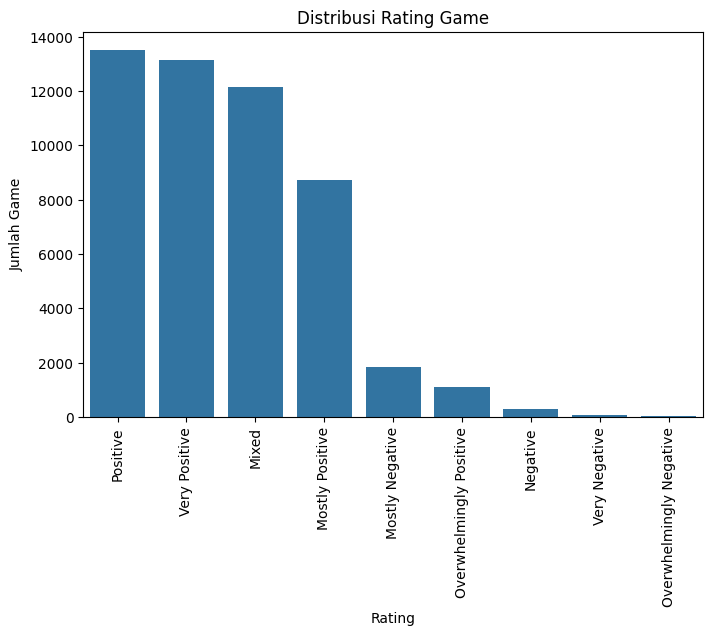

In [133]:
# Visualisasi distribusi rating
plt.figure(figsize=(8, 5))
sns.countplot(data=game_df, x='rating', order=game_df['rating'].value_counts().index)
plt.title('Distribusi Rating Game')
plt.xlabel('Rating')
plt.ylabel('Jumlah Game')
plt.xticks(rotation=90)  # Rotate x-axis labels to vertical
plt.show()

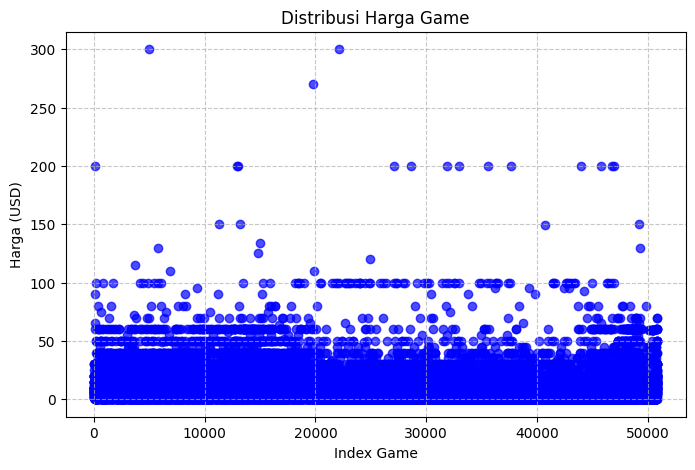

In [134]:
# Visualisasi distribusi harga menggunakan scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(x=game_df.index, y=game_df['price_final'], alpha=0.7, color='b')
plt.title('Distribusi Harga Game')
plt.xlabel('Index Game')
plt.ylabel('Harga (USD)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Top 10 game dengan jumlah ulasan terbanyak:
                                   title  user_reviews
14398  Counter-Strike: Global Offensive       7494460
47770               PUBG: BATTLEGROUNDS       2217226
13176                            Dota 2       2045628
12717                Grand Theft Auto V       1484122
14535   Tom Clancy's Rainbow Six® Siege        993312
47380                   Team Fortress 2        985819
13035                          Terraria        943413
15363                       Garry's Mod        853733
13173                              Rust        786668
14376                     Apex Legends™        713182


C:\Users\GEMINK1\AppData\Local\Temp\ipykernel_10760\399102158.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_reviewed_games, y='title', x='user_reviews', palette='viridis')


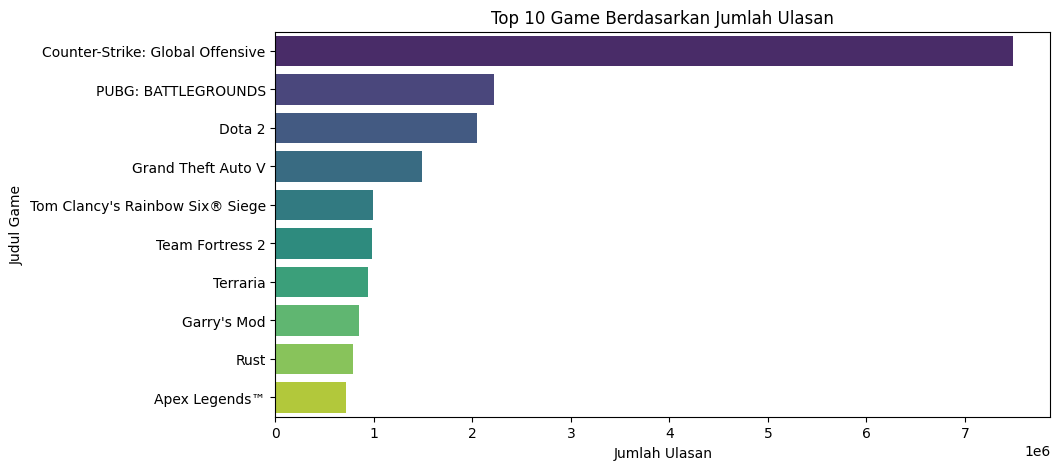

In [135]:
# Top 10 game dengan ulasan terbanyak
top_reviewed_games = game_df[['title', 'user_reviews']].sort_values(by='user_reviews', ascending=False).head(10)
print("Top 10 game dengan jumlah ulasan terbanyak:\n", top_reviewed_games)

# Visualisasi
plt.figure(figsize=(10, 5))
sns.barplot(data=top_reviewed_games, y='title', x='user_reviews', palette='viridis')
plt.title('Top 10 Game Berdasarkan Jumlah Ulasan')
plt.xlabel('Jumlah Ulasan')
plt.ylabel('Judul Game')
plt.show()


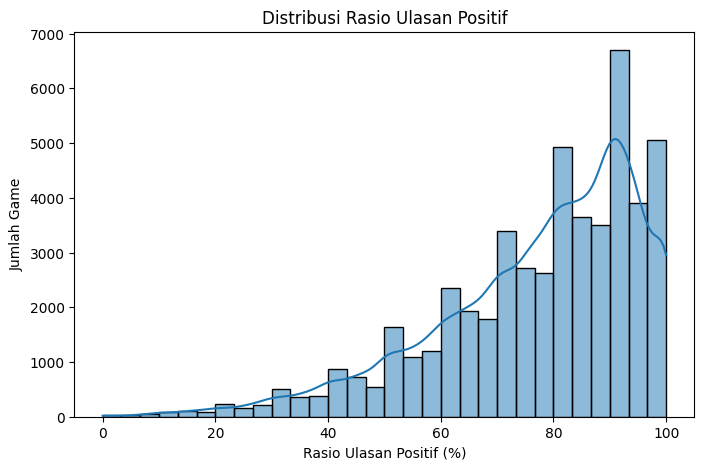

In [136]:
# Visualisasi distribusi rasio ulasan positif
plt.figure(figsize=(8, 5))
sns.histplot(data=game_df, x='positive_ratio', bins=30, kde=True)
plt.title('Distribusi Rasio Ulasan Positif')
plt.xlabel('Rasio Ulasan Positif (%)')
plt.ylabel('Jumlah Game')
plt.show()


## Modeling and Results

Pada tahap ini, kita akan membuat sistem rekomendasi dengan dua pendekatan yang berbeda, yaitu Content-based Filtering dan Collaborative Filtering.
### Content-Based Filtering

Pendekatan ini memanfaatkan fitur-fitur dari game itu sendiri, seperti rating, positive_ratio, dan user_reviews. Dengan menggunakan teknik ini, kita menghitung kemiripan antar game berdasarkan fitur-fitur tersebut dan memberikan rekomendasi game yang mirip dengan game yang sudah dipilih pengguna.

- Langkah-langkah Content-Based Filtering:

    - Menentukan fitur yang relevan (dalam hal ini rating, positive_ratio, dan user_reviews).
    - Normalisasi data dan konversi rating menjadi skor numerik untuk menghitung kemiripan.
    - Menggunakan cosine similarity untuk menghitung seberapa mirip suatu game dengan game lainnya.
    - Memberikan top-N game dengan kemiripan tertinggi sebagai rekomendasi.

- Pendekatan K-Nearest Neighbors (KNN) untuk Rekomendasi
    
    Pendekatan ini dapat digunakan untuk mencari game yang serupa berdasarkan atribut-atribut tertentu. Sebagai gantinya, kita bisa menggunakan metode K-Nearest Neighbors untuk merekomendasikan game berdasarkan fitur yang sudah ada.
    
    K-Nearest Neighbors (KNN) digunakan untuk mencari game yang paling mirip dengan game yang diberikan berdasarkan fitur-fitur yang telah dinormalisasi seperti positive_ratio_scaled, user_reviews_scaled, dan rating_score.

In [137]:
#Konversi kolom rating ke skor numerik
rating_map = {
    'Very Positive': 5,
    'Positive': 4,
    'Mixed': 3,
    'Negative': 2,
    'Very Negative': 1
}
game_df['rating_score'] = game_df['rating'].map(rating_map)


In [138]:
#Normalisasi kolom positive_ratio dan user_reviews
scaler = MinMaxScaler()
game_df['positive_ratio_scaled'] = scaler.fit_transform(game_df[['positive_ratio']])
game_df['user_reviews_scaled'] = scaler.fit_transform(game_df[['user_reviews']])


In [139]:
features = game_df[['positive_ratio_scaled', 'user_reviews_scaled', 'rating_score']]

In [140]:
# Mengisi NaN dengan rata-rata kolom
features = features.fillna(features.mean())


In [141]:
# Membangun model KNN
knn = NearestNeighbors(n_neighbors=10)  # 10 tetangga terdekat
knn.fit(features)

NearestNeighbors(n_neighbors=10)

In [142]:
# Menemukan rekomendasi untuk game tertentu
def recommend_games_knn(game_title, dataset, knn_model):
    game = dataset[dataset['title'] == game_title]
    
    if game.empty:
        return "Game tidak ditemukan."
    
    # Menemukan tetangga terdekat
    distances, indices = knn_model.kneighbors(game[['positive_ratio_scaled', 'user_reviews_scaled', 'rating_score']])
    
    # Mendapatkan rekomendasi game berdasarkan index
    recommended_titles = dataset.iloc[indices[0]]['title']
    return recommended_titles


In [143]:
# Contoh rekomendasi
game_title = "ELDEN RING"
recommended_games = recommend_games_knn(game_title, game_df, knn)
print("Rekomendasi untuk game:", game_title)
print(recommended_games)

Rekomendasi untuk game: ELDEN RING
14453                           ELDEN RING
50781                             Among Us
47637                             Unturned
12712                Red Dead Redemption 2
14563                             PAYDAY 2
15096                                 Raft
3372                         Geometry Dash
15719          Sea of Thieves 2023 Edition
16071                      DARK SOULS™ III
13598    Halo: The Master Chief Collection
Name: title, dtype: object
